In [77]:
import math

def _avg_cmp(bst, level):
    if bst.l_child == None and bst.r_child == None:
        return level
    elif bst.l_child != None and bst.r_child == None:
        return level + _avg_cmp(bst.l_child, level + 1)
    elif bst.l_child == None and bst.r_child != None:
        return level + _avg_cmp(bst.r_child, level + 1)
    return level + _avg_cmp(bst.l_child, level + 1) + _avg_cmp(bst.r_child, level + 1)

def avg_cmp(bst):
    return _avg_cmp(bst, 1)

def max_height(bst):
    if bst.l_child == None and bst.r_child == None:
        return 1
    elif bst.l_child != None and bst.r_child == None:
        return 1 + max_height(bst.l_child)
    elif bst.l_child == None and bst.r_child != None:
        return 1 + max_height(bst.r_child)
    return 1 + max(max_height(bst.l_child), max_height(bst.r_child))

def avg_height(bst):
    return math.floor(avg_cmp(bst))

In [78]:
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

def insert(root, node):
    """inserts a node into a tree rooted at root, returns the root"""
    if root is None:
        root = node
    else:
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
            else:
                insert(root.l_child, node)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                insert(root.r_child,node)
    return root
        
MAX_NODES_NUM = 200    
    
import random
bst = None

max_heights = [0]
avg_heights = [0]

for i in range(1, MAX_NODES_NUM):
    for x in [Node(random.randint(0,100)) for _ in range(i)]: 
        if not bst: 
            bst = x
        else: 
            insert(bst, x)
    max_heights.append(max_height(bst))
    avg_heights.append(avg_height(bst) / i)
    bst = None

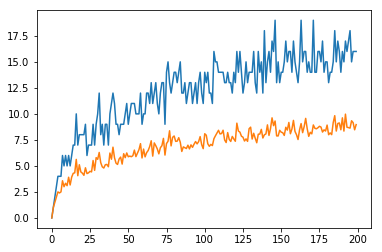

In [79]:
from matplotlib import pyplot as plt

plt.plot(range(MAX_NODES_NUM), max_heights)
plt.plot(range(MAX_NODES_NUM), avg_heights)
plt.show()